In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [186]:
df = pd.read_csv("data/cleaned_data.csv")
df

,Unnamed: 0,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1,False
1,1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1,False
2,2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1,False
3,3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1,False
4,4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
6231,6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,1,False
6232,6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,0,False
6233,6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,0,False
6234,6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,0,False


In [187]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [188]:
df.isna().sum()

Year               0
Month              0
Day                0
MaxT               0
MinT               0
AvgT               0
WindSpeed          0
Humidity           0
Precipitation      0
Rainfall           0
ExtremeRainfall    0
dtype: int64

# Data Info
Maximum Temperature(°C)<br>
Minimum Temperature(°C)<br>
Humidity(%)<br>
Precipitation(mm)<br>

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             6236 non-null   int64  
 1   Month            6236 non-null   int64  
 2   Day              6236 non-null   int64  
 3   MaxT             6236 non-null   float64
 4   MinT             6236 non-null   float64
 5   AvgT             6236 non-null   float64
 6   WindSpeed        6236 non-null   float64
 7   Humidity         6236 non-null   float64
 8   Precipitation    6236 non-null   float64
 9   Rainfall         6236 non-null   int64  
 10  ExtremeRainfall  6236 non-null   bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 493.4 KB


In [190]:
df.describe()

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
count,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000,6236.000000
mean,2014.058050,6.499679,15.737011,33.345670,24.738133,29.041902,2.822723,67.136754,3.426507,0.768602
std,4.925833,3.459816,8.800276,3.267526,3.115995,2.910686,1.059630,11.311272,8.270122,0.421760
min,2006.000000,1.000000,1.000000,21.900000,14.400000,20.550000,0.500000,30.500000,0.000000,0.000000
25%,2010.000000,3.000000,8.000000,30.900000,22.400000,26.800000,2.100000,59.500000,0.000000,1.000000
50%,2014.000000,7.000000,16.000000,33.000000,25.400000,29.050000,2.500000,68.250000,0.000000,1.000000
75%,2018.000000,10.000000,23.000000,35.300000,27.000000,30.950000,3.400000,75.600000,2.600000,1.000000
max,2023.000000,12.000000,31.000000,48.000000,33.000000,39.500000,7.900000,95.100000,128.300000,1.000000


## Precipitation as our target variable

Most days of the year it doesn't rain. Finding the months when it rains could be helpful to see a pattern. Average rain is about 3.43(mm).<br>
We also need to check the features that have the most correlation with Precipitation. <br>
We could have a classification model as well checking if it will rain or not and have a regression model on how much in mm will it rain.

<Axes: >

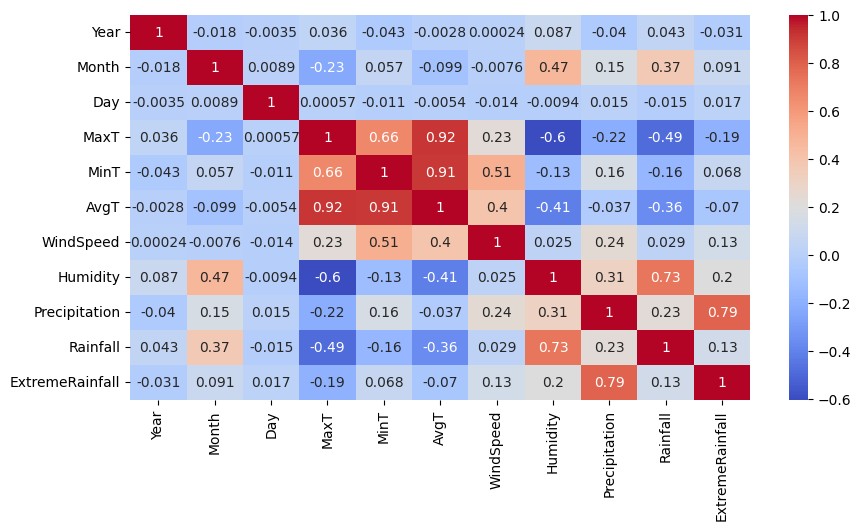

In [191]:
# A correlation heat map for each pair of explanatory variables.
plt.figure(figsize=(10, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Data Correlation
As expected, 'ExtremeRainfall' and 'Rainfall' have the most correlation, but 'Windspeed' = 0.24 and 'Humidity' = 0.31 have a weak correlation with 'Precipitation'. As well as, 'Month', 'MaxT' and 'MinT' have some but weak correlation.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'MaxT'}>,
        <Axes: title={'center': 'MinT'}>,
        <Axes: title={'center': 'AvgT'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

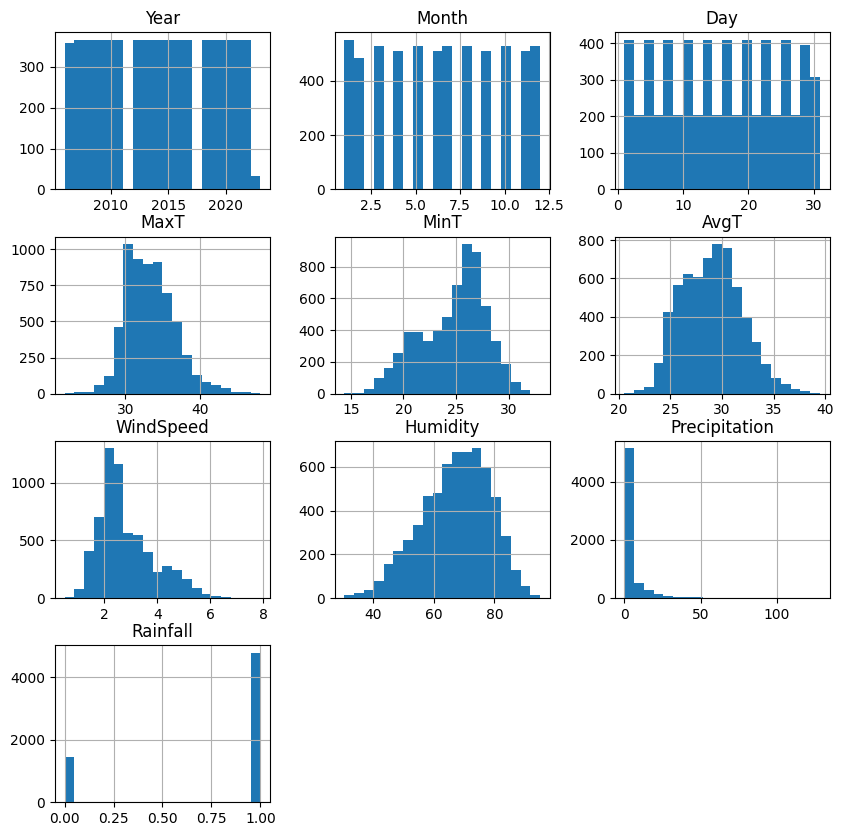

In [192]:
# Histograms for each feature
df.hist(figsize=(10, 10), bins=20)

# Train and Test split

Initially I will make a model only to predict if it rained or not.

In [193]:
df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall,ExtremeRainfall
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1,False
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1,False
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1,False
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1,False
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...
6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,1,False
6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,0,False
6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,0,False
6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,0,False


In [194]:
rainfall_df = df.drop(['ExtremeRainfall'], axis=1)
rainfall_df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,Rainfall
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,1
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,1
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,1
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,1
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,1
...,...,...,...,...,...,...,...,...,...,...
6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,1
6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,0
6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,0
6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,0


In [195]:
from sklearn.model_selection import train_test_split

X = df.drop(['Rainfall'], axis=1)
y = df['Rainfall']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [196]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(trainX)
X_test_scaled = scaler.transform(testX)

In [197]:
# Initialize the Linear Regression model
lg_model = LogisticRegression()

# Fit the model on the training data
lg_model.fit(trainX, trainY)

# Predict on the testing set
lg_pred = model.predict(testX)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse_lg = mean_squared_error(testY, lg_pred)
r2_lg = r2_score(testY, lg_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Logistic Regression: {mse_lg}")
print(f"R-squared Value for Logistic Regression: {r2_lg}")

Mean Squared Error for Logistic Regression: 0.009615384615384616
R-squared Value for Logistic Regression: 0.9487179487179487


In [199]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier()

# Fit the model on the training data
dTreeModel.fit(trainX, trainY)

# Predict on the testing set
dt_pred = dTreeModel.predict(testX)

In [200]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse = mean_squared_error(testY, dt_pred)
r2 = r2_score(testY, dt_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Decision Tree: {mse}")
print(f"R-squared Value for Decision Tree: {r2}")

Mean Squared Error for Decision Tree: 0.0
R-squared Value for Decision Tree: 1.0


In [180]:
et_df = df.drop(['Rainfall'], axis=1)
et_df

,Year,Month,Day,MaxT,MinT,AvgT,WindSpeed,Humidity,Precipitation,ExtremeRainfall
0,2006,1,8,29.5,21.8,25.65,1.6,70.2,0.0,False
1,2006,1,9,30.1,21.0,25.55,1.6,67.4,0.0,False
2,2006,1,10,29.9,21.1,25.50,1.7,65.2,0.0,False
3,2006,1,11,29.8,20.8,25.30,1.5,69.0,0.0,False
4,2006,1,12,29.6,20.5,25.05,2.1,69.5,0.0,False
...,...,...,...,...,...,...,...,...,...,...
6231,2023,1,30,34.0,19.0,26.50,4.0,63.0,0.0,False
6232,2023,1,31,37.0,19.0,28.00,2.9,57.5,0.0,False
6233,2023,2,1,34.0,20.0,27.00,2.3,55.0,0.0,False
6234,2023,2,2,38.0,19.0,28.50,2.4,54.0,0.0,False


In [ ]:
X_dt = df.drop(['Ext'], axis=1)
y_dt = df['Rainfall']

trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2, random_state=42)

In [168]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier()

# Fit the model on the training data
dTreeModel.fit(trainX, trainY)

# Predict on the testing set
dt_pred = dTreeModel.predict(testX)

In [169]:
# Calculate the Mean Squared Error (MSE) and R-squared value for evaluation
mse = mean_squared_error(testY, dt_pred)
r2 = r2_score(testY, dt_pred)

# Print the MSE and R-squared value
print(f"Mean Squared Error for Decision Tree: {mse}")
print(f"R-squared Value for Decision Tree: {r2}")


#saving our model to a pickle, for transfer to streamlit
filename = 'rainfall_prediction_model.pkl'
pickle.dump(dTreeModel, open(filename, 'wb')) 

Mean Squared Error for Decision Tree: 0.0
R-squared Value for Decision Tree: 1.0
